In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

## 1/4 degree

In [2]:
%%time
ds = xr.open_zarr(
    "gcs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree/03h-freq/zarr-1year/fv3.zarr",
    storage_options={"token": "anon"},
)

CPU times: user 487 ms, sys: 59.9 ms, total: 547 ms
Wall time: 1.5 s


In [3]:
ds.tmp2m.nbytes/1e9

13.787725824

In [4]:
%%time
tmp = ds["tmp2m"].load();

CPU times: user 25.2 s, sys: 13.6 s, total: 38.8 s
Wall time: 28.3 s


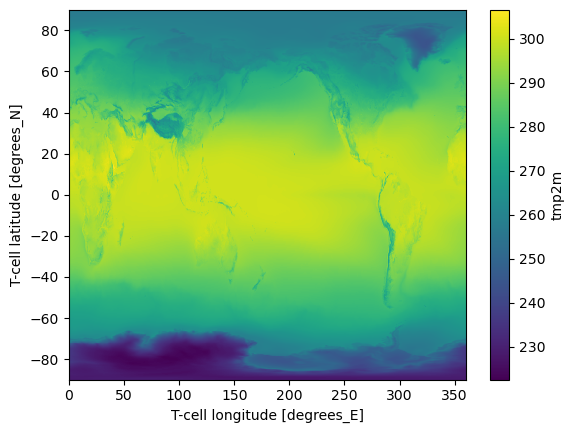

In [5]:
tmp.mean("time").plot()

In [6]:
ds.data_vars

Data variables:
    clwmr       (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 768, 1536), meta=np.ndarray>
    dpres       (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 768, 1536), meta=np.ndarray>
    f10m        (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 768, 1536), meta=np.ndarray>
    grle        (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 768, 1536), meta=np.ndarray>
    icec        (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 768, 1536), meta=np.ndarray>
    icmr        (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 768, 1536), meta=np.ndarray>
    land        (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 768, 1536), meta=np.ndarray>
    nicp        (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 768, 1536), meta=np.ndarray>
    ntrnc       (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 768, 1536), me

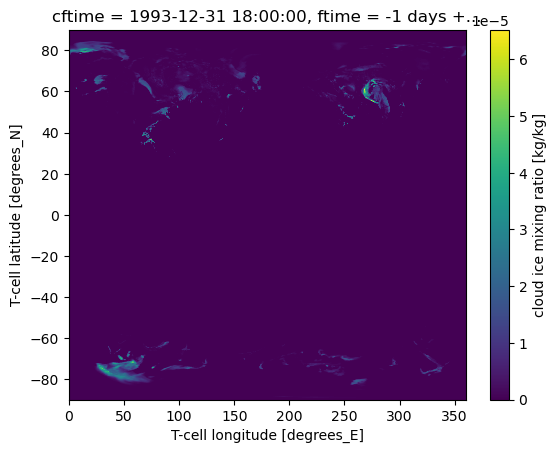

In [7]:
ds.icmr.isel(time=0, pfull=-1).plot()

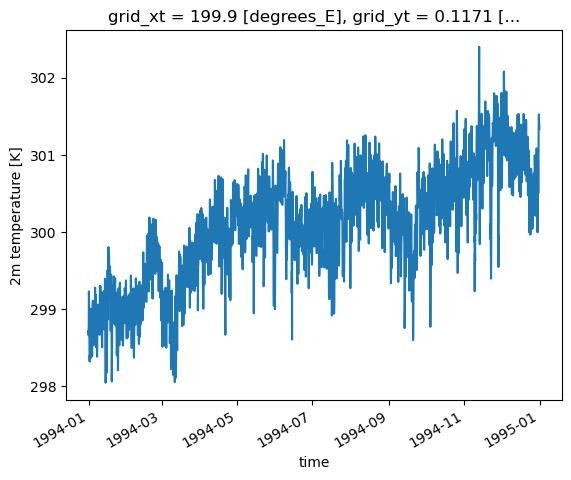

In [8]:
point = tmp.sel(grid_xt=200, grid_yt=0, method="nearest")
point.plot()

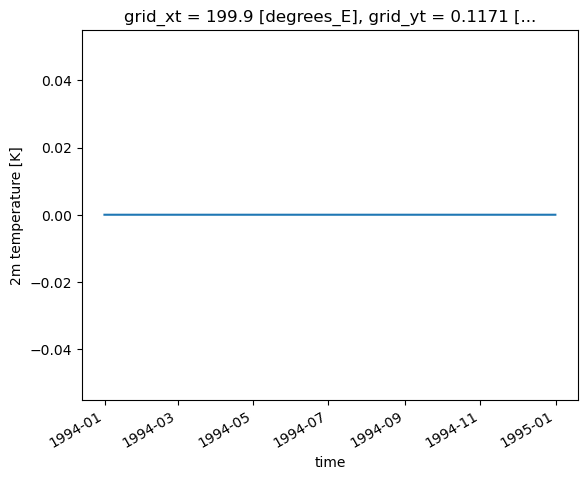

In [9]:
np.isnan(point).plot()

In [10]:
np.unique(point.time.diff("time"))

array([10800000000000], dtype='timedelta64[ns]')

## 1 degree

In [2]:
ds = xr.open_zarr(
    "gcs://noaa-ufs-gefsv13replay/ufs-hr1/1.00-degree/03h-freq/zarr/fv3.zarr",
    storage_options={"token": "anon"},
)

In [3]:
ds.tmp2m.nbytes/1e9

4.693819392

In [4]:
%%time
tmp = ds["tmp2m"].load();

CPU times: user 28.5 s, sys: 6.74 s, total: 35.3 s
Wall time: 3min 54s


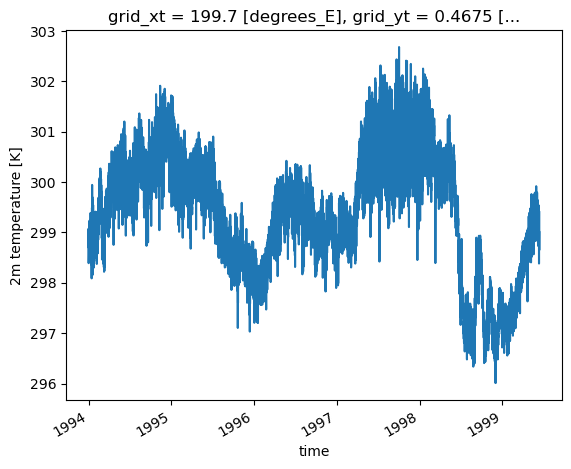

In [5]:
point = tmp.sel(grid_xt=200, grid_yt=0, method="nearest")
point.plot()

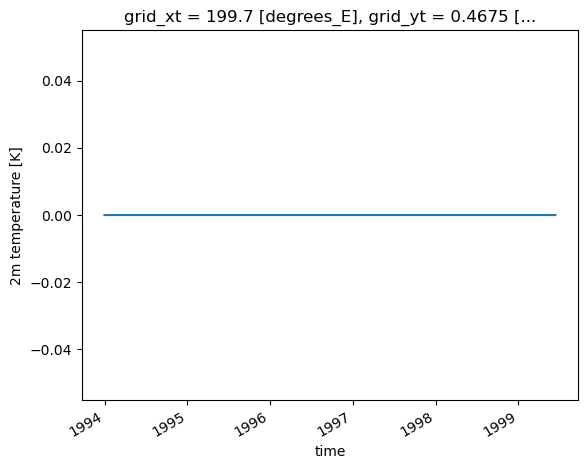

In [6]:
np.isnan(point).plot()

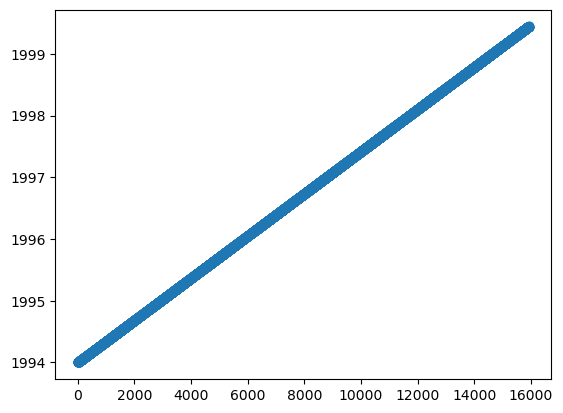

In [7]:
plt.scatter(range(len(point.time)), point.time.values)

In [9]:
np.unique(point.time.diff("time"))

array([10800000000000], dtype='timedelta64[ns]')

In [10]:
ds1 = xr.open_zarr("../zstores/local-replay-1deg-slurmtest/forecast/fv3.zarr/")

In [11]:
ds1.time

<xarray.DataArray 'time' (time: 34)>
array(['1993-12-31T18:00:00.000000000', '1993-12-31T21:00:00.000000000',
       '1994-01-01T00:00:00.000000000', '1994-01-01T03:00:00.000000000',
       '1994-01-01T06:00:00.000000000', '1994-01-01T09:00:00.000000000',
       '1994-01-01T12:00:00.000000000', '1994-01-01T15:00:00.000000000',
       '1994-01-01T18:00:00.000000000', '1994-01-01T21:00:00.000000000',
       '1994-01-02T00:00:00.000000000', '1994-01-02T03:00:00.000000000',
       '1994-01-02T06:00:00.000000000', '1994-01-02T09:00:00.000000000',
       '1994-01-02T12:00:00.000000000', '1994-01-02T15:00:00.000000000',
       '1994-01-02T18:00:00.000000000', '1994-01-02T21:00:00.000000000',
       '1994-01-03T00:00:00.000000000', '1994-01-03T03:00:00.000000000',
       '1994-01-03T06:00:00.000000000', '1994-01-03T09:00:00.000000000',
       '1994-01-03T12:00:00.000000000', '1994-01-03T15:00:00.000000000',
       '1994-01-03T18:00:00.000000000', '1994-01-03T21:00:00.000000000',
       '1994-01-04T00:00:00.000000000', '1994-01-04T03:00:00.000000000',
       '1994-01-04T06:00:00.000000000', '1994-01-04T09:00:00.000000000',
       '1994-01-04T12:00:00.000000000', '1994-01-04T15:00:00.000000000',
       '1994-01-04T18:00:00.000000000', '1994-01-04T21:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    cftime   (time) object dask.array<chunksize=(34,), meta=np.ndarray>
    ftime    (time) timedelta64[ns] dask.array<chunksize=(34,), meta=np.ndarray>
  * time     (time) datetime64[ns] 1993-12-31T18:00:00 ... 1994-01-04T21:00:00
Attributes:
    axis:       T
    long_name:  time

In [5]:
ds1.time.values == ds2.time.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [ ]:
tmp.sel(

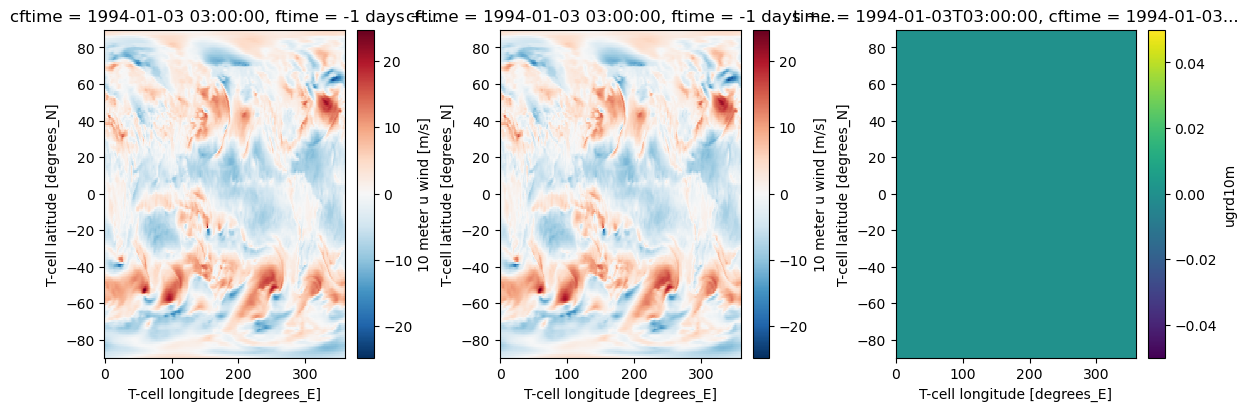

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(12,4), constrained_layout=True)

for xds, ax in zip([ds, ds1, ds1-ds], axs):
    plotme = xds["ugrd10m"].sel(time="1994-01-03T03")
    plotme.plot(ax=ax)